# Setup and Data Preparation
* Import necessary libraries like numpy, tensorflow and matplotlib.
* Load the MNIST dataset using tensorflow.keras.datasets.mnist.
* Display some of the images with their class labels.
* Normalize the dataset so that pixel values range between O and 1.  
* Reshape the input data appropriately for the LeNet-5 model.


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from keras.datasets import mnist


In [3]:
(train_img,train_label),(test_img,test_label) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


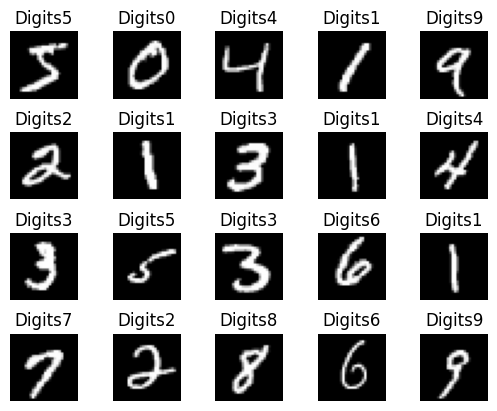

In [4]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(train_img[i],cmap='gray')
  plt.title("Digits"+str(train_label[i]))
  plt.subplots_adjust(hspace=0.5)
  plt.axis('off')

In [5]:
train_img=train_img/255
test_img=test_img/255
m,n=train_img[0].shape

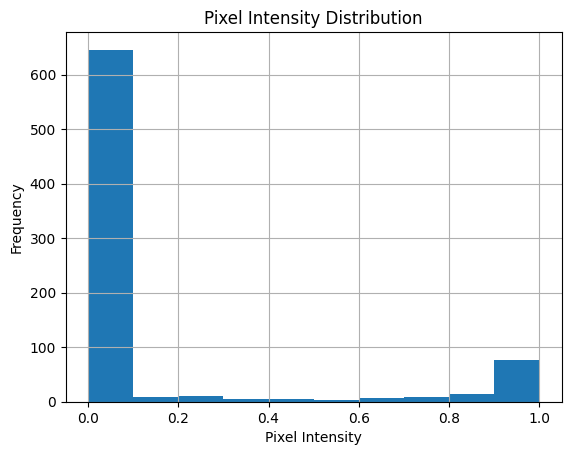

In [6]:
plt.hist(train_img[1122].reshape(m*n))
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Pixel Intensity Distribution')
plt.grid()
plt.show()

# LeNet-5 Model Implementation
* Build the LeNet-5 architecture:
* Input layer: Accept 28x28 grayscale images.
* Convolutional layer: 6 filters, kernel size 5x5, followed by tanh activation.
* Pooling layer: 2x2 max pooling.
* Second convolutional layer: 16 filters, kernel size 5x5, followed by tanh activation.
* Second pooling layer: 2x2 max pooling.
* Flatten layer: to reshape the data into a vector.
* Fully connected layer: 120 units, followed by tanh.
* Second fully connected layer: 84 units, followed by tanh.
* Output layer: 1O units (one per digit), followed by softmax activation.


In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D ,Activation


model = Sequential()
model.add(Conv2D(6, 5, activation='tanh',input_shape=(28,28,1)))
model.add(MaxPooling2D(2))
model.add(Conv2D(16, 5, activation='tanh'))
model.add(MaxPooling2D(2))
model.add(Conv2D(120,3, activation='tanh'))
model.add(Flatten())
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))  # 10 classess classification as number lies between 0 to 9
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 2, 2, 120)           │          17,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 480)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 84)                  │          40,404 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,226 (239.16 KB)

 Trainable params: 61,226 (239.16 KB)

 Non-trainable params: 0 (0.00 B)

# Training the Model
* Compile the model with the following configurations:
* Loss function: sparse_categorical_crossentropy.
* Optimizer: adam or sgd.
* Metrics: accuracy.
* Train the model using the training data for 20 epochs with a batch size of 32.
* Use early stopping to stop if the training loss does not improve for a long time.
* Evaluate the model on the test set.

In [8]:
#Compile and Train
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_img,train_label,epochs=20,batch_size=32)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8961 - loss: 0.3532
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9768 - loss: 0.0731
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9831 - loss: 0.0558
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9870 - loss: 0.0436
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9879 - loss: 0.0380
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9904 - loss: 0.0301
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9914 - loss: 0.0253
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9930 - loss: 0.0225
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9938 - loss: 0.0200
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9942 - loss: 0.0174
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9963 - loss: 0.0129
Epoch 12/20
1875/1875 ━━━━

In [9]:
loss, accuracy=model.evaluate(test_img,test_label)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9821 - loss: 0.0606


# Analyzing Results
* Plot training and validation accuracy/loss graphs for the epochs.  
* Find the accuracy and loss on the test dataset.
* Generate the classification report for the test dataset.
* Visualize predictions for 1O randomly chosen test images and compare them with their actual labels.

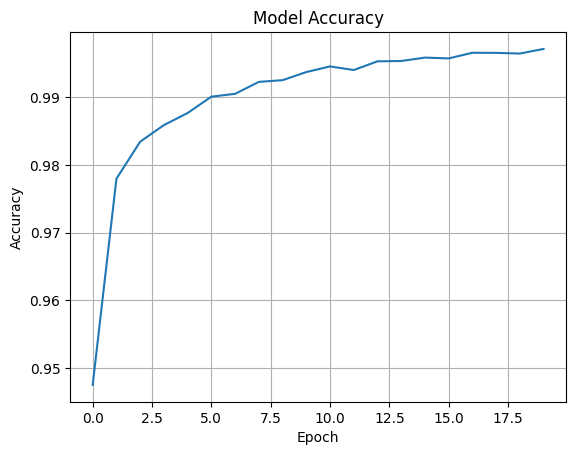

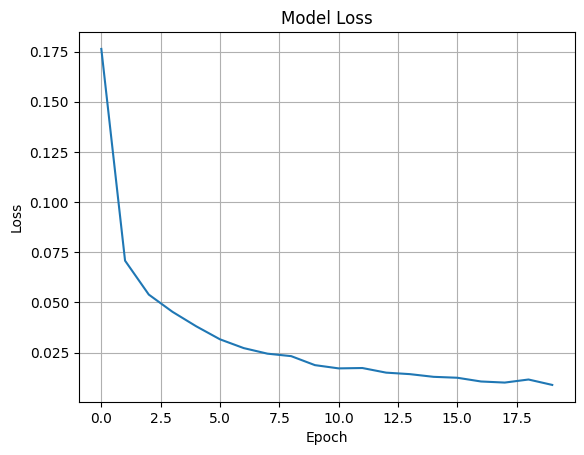

In [18]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.show()

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.show()

In [19]:
print('Test Loss:',loss)
print('Test Accuracy:',accuracy)

Test Loss: 0.046144865453243256
Test Accuracy: 0.9866999983787537


In [20]:
from sklearn.metrics import classification_report
y_pred=model.predict(test_img)
y_pred=np.argmax(y_pred,axis=1)
print(classification_report(y_pred,test_label))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       989
           1       1.00      0.99      0.99      1139
           2       0.98      0.99      0.99      1026
           3       0.99      0.99      0.99      1014
           4       0.99      0.99      0.99       981
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       957
           7       0.96      1.00      0.98       996
           8       0.99      0.98      0.99       987
           9       0.99      0.98      0.98      1019

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


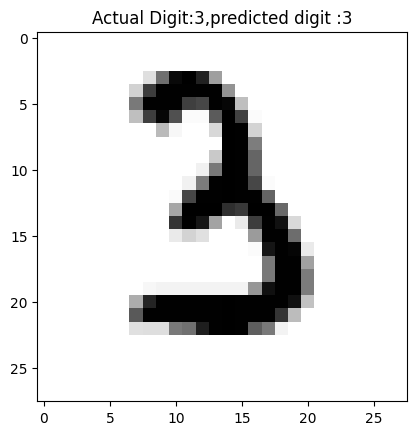

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


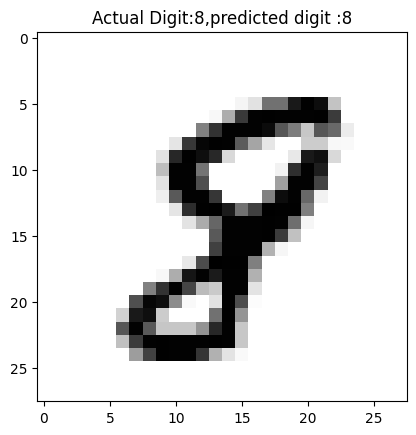

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


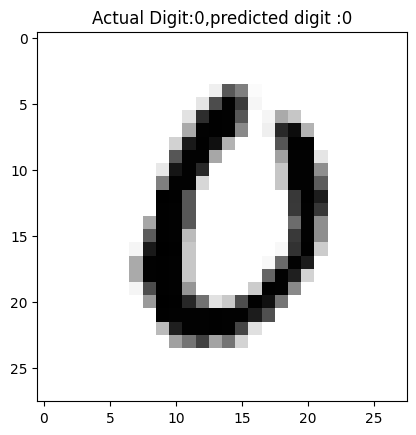

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


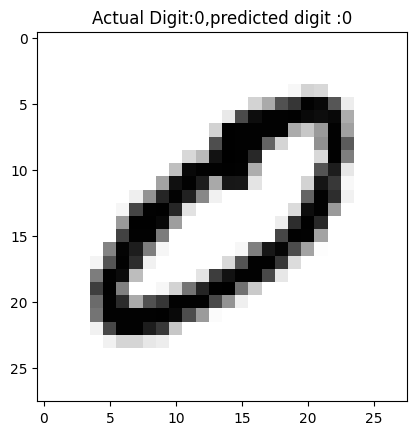

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


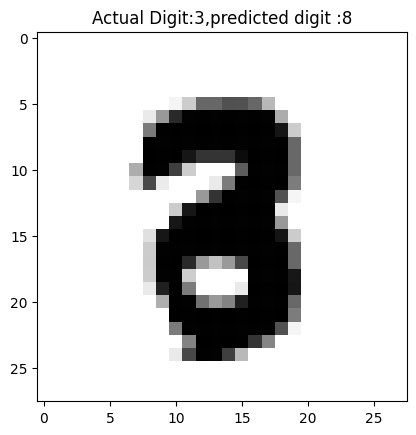

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


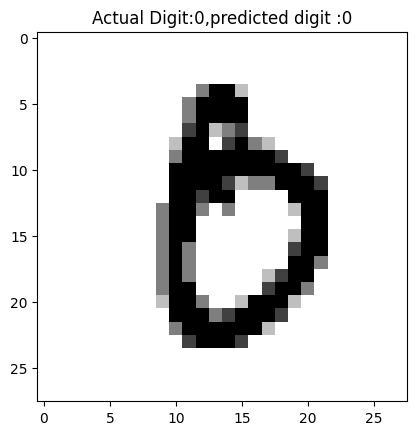

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


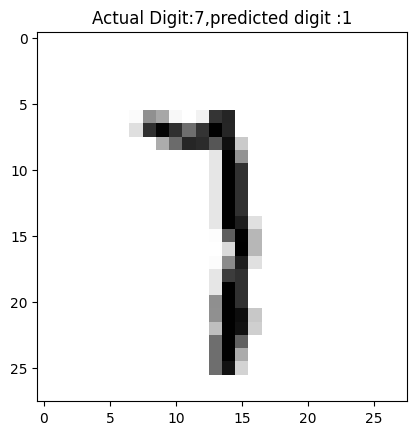

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


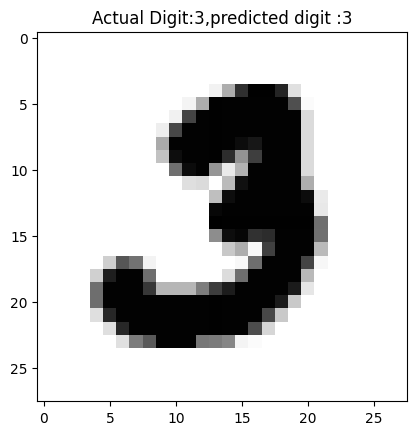

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


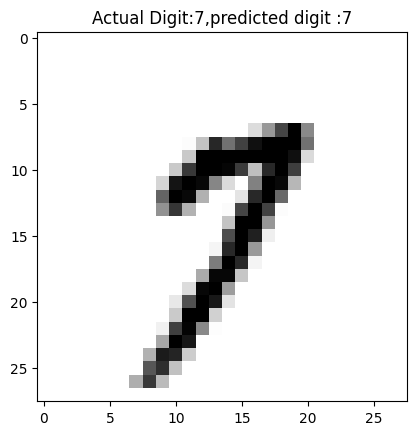

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


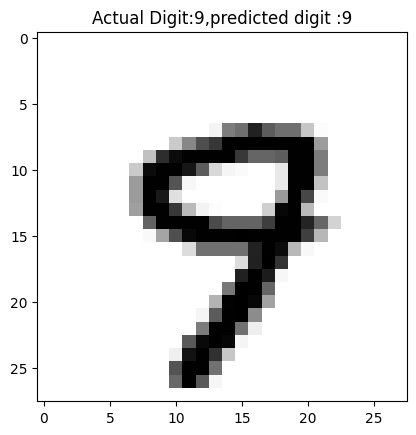

In [21]:
for i in range(10):
  index=np.random.randint(10000)
  predicted=model.predict(test_img)
  plt.imshow(test_img[index],cmap='gray_r')
  plt.title('Actual Digit:'+str(test_label[index])+',predicted digit :'+str(np.argmax(predicted[index])))
  plt.show()
